In [1]:
# import the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import  LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pickle

In [2]:
breast_data = pd.read_csv("breast_cancer.csv")
breast_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


* ID number
* Diagnosis (M = malignant, B = benign)
*  radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values)
* perimeter
* area
* smoothness (local variation in radius lengths)
* compactness (perimeter^2 / area - 1.0)
* concavity (severity of concave portions of the contour)
* concave points (number of concave portions of the contour)
* symmetry
* fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is **Mean Radius**, field 13 is **Radius SE**, field 23 is **Worst Radius**.


### Data Collection & Processing

In [3]:
# change the diagnosis column to the name Target
breast_data['target'] = breast_data['diagnosis']
breast_data = breast_data.drop('diagnosis', axis=1)

In [4]:
# print the number of rows and columns
breast_data.shape

(569, 32)

In [5]:
breast_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [6]:
# checking for missing value
breast_data.isnull().sum()

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
target                     0
dtype: int64

 Remove Unnamed:32 column, since all of the columns are missing value

In [7]:
breast_data = breast_data.drop(columns=['id'], axis=1)

In [8]:
# statistical measures about the data
breast_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave_points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [9]:
# checking the distribution of target variable
breast_data['target'].value_counts()

target
B    357
M    212
Name: count, dtype: int64

In [10]:
# converting the M and B in target column to interger. 1 -> Malignant; 0 -> Benign
breast_data['target'] = (breast_data['target']=='M').astype(int)

In [11]:
breast_data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


#### Find the highly correlated features with the target.


<Axes: >

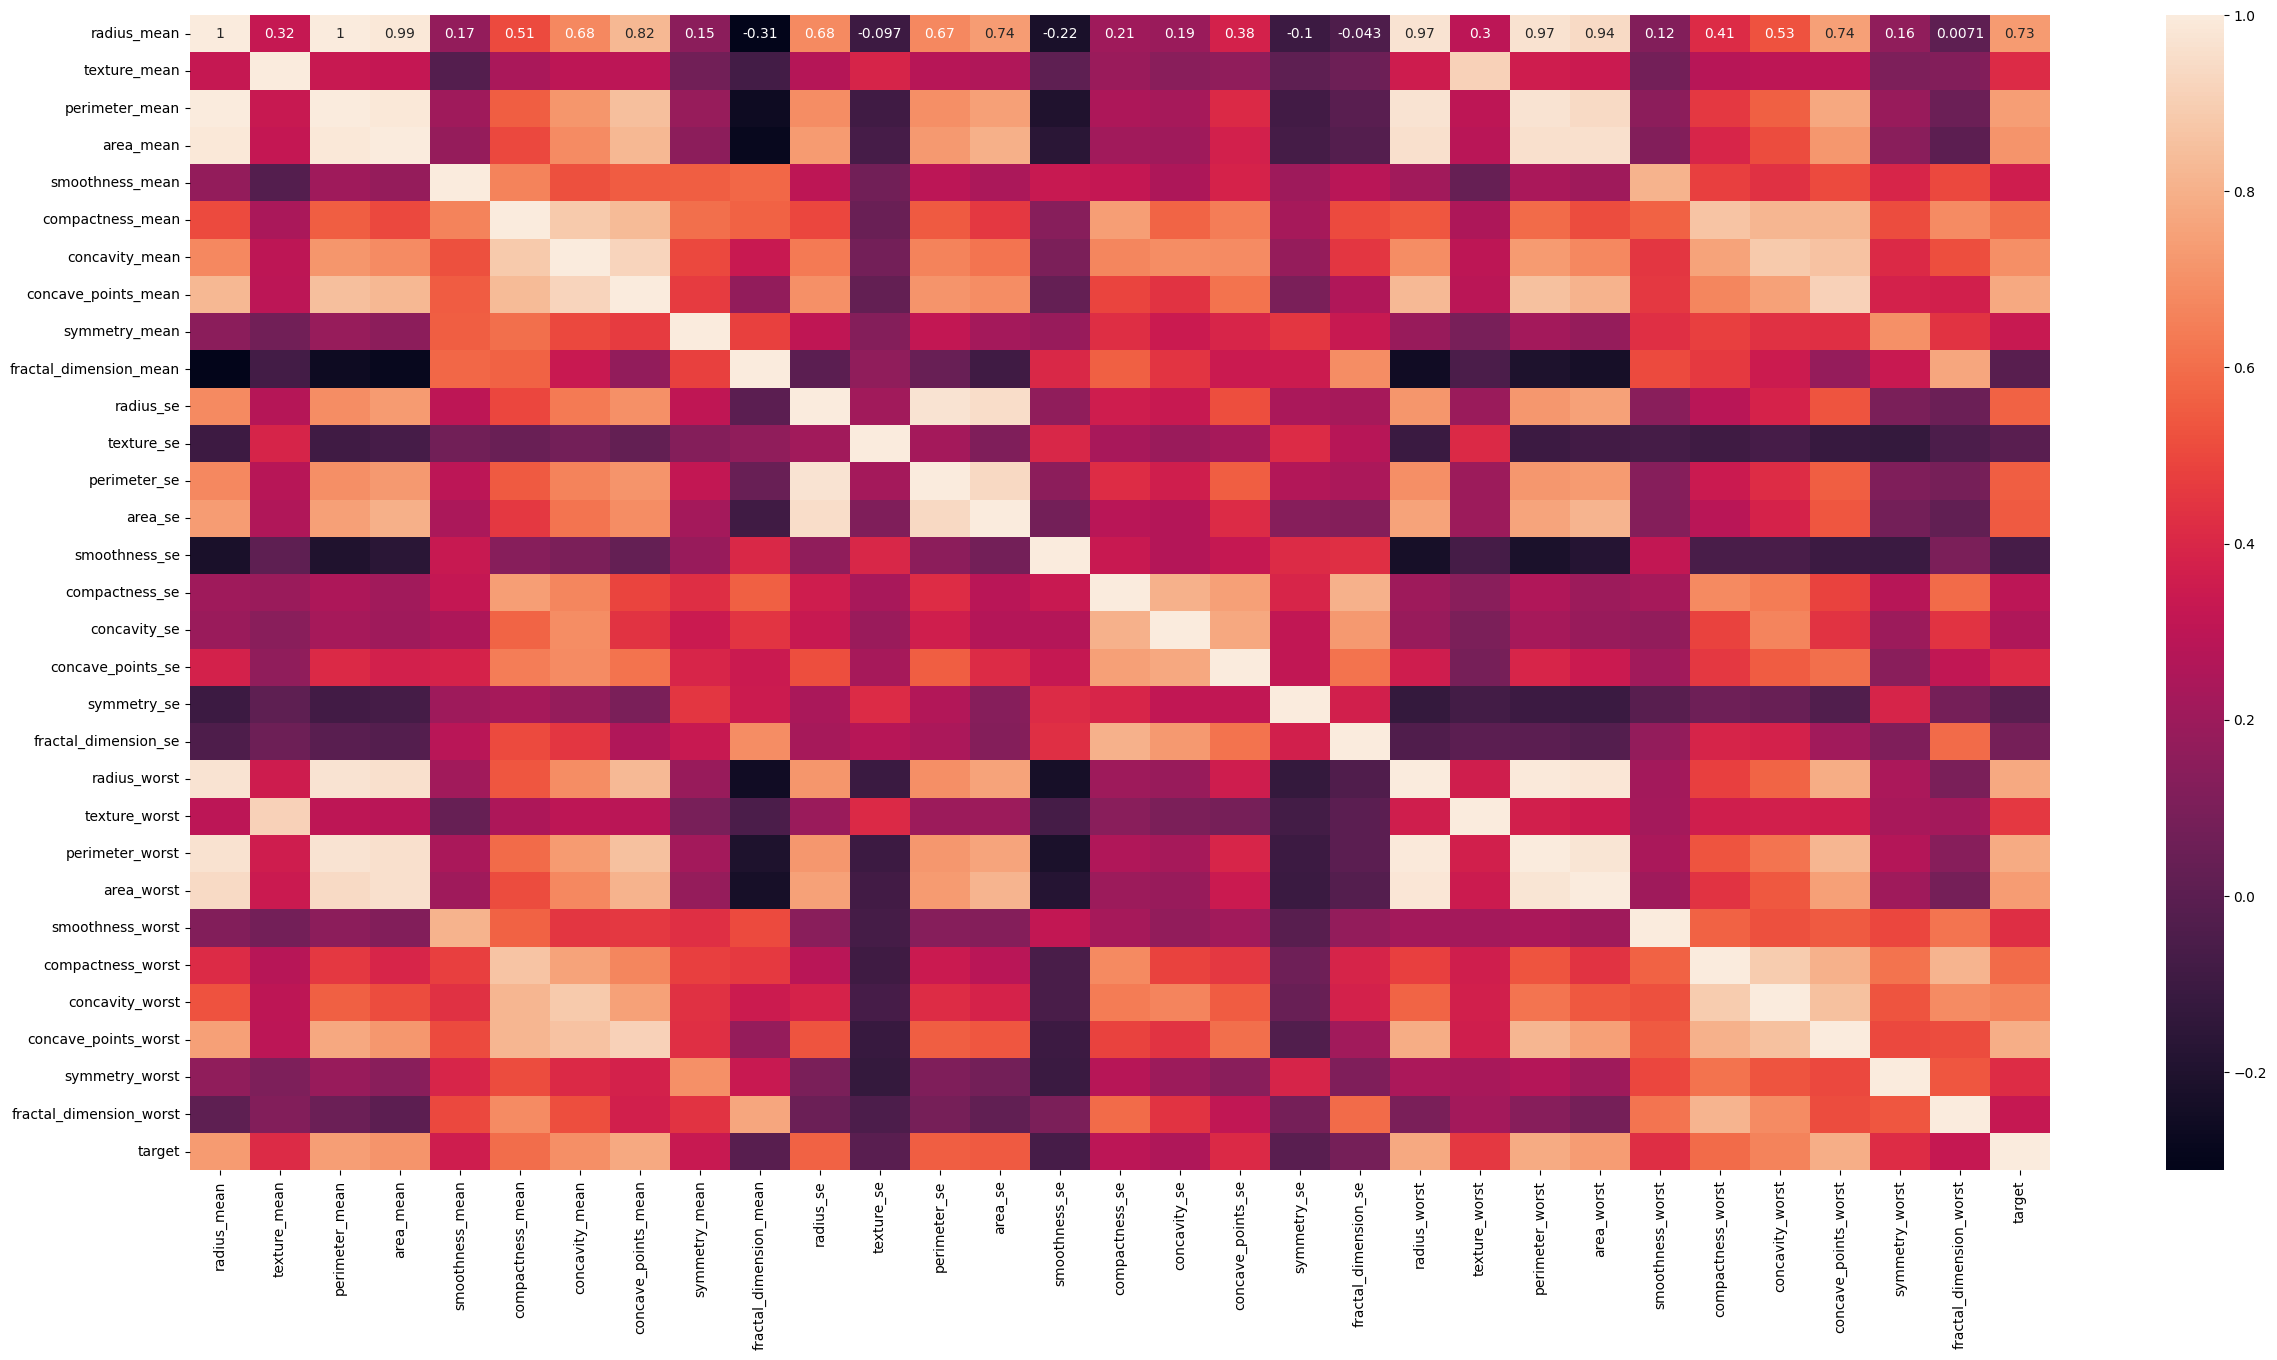

In [12]:
plt.figure(figsize=(30,15))
sns.heatmap(breast_data.corr(), annot=True)

#### Splitting the data into train, test, split

In [13]:
X = breast_data.drop('target', axis=1)
y = breast_data['target']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=2)

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Training

#### 1. Logistic Regression

In [16]:
model_lr = LogisticRegression(solver='liblinear')

param_grid = {
    'C': np.logspace(0,10,1),
    'penalty' : ['l1', 'l2'],
    'max_iter': [1000, 2000, 3000]
}

grid_search = GridSearchCV(model_lr, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

# the best SVM model
best_lr_model = grid_search.best_estimator_

# Predict using the best model
y_pred = grid_search.predict(X_test)

# Print the best params and evaluate the predictions
print("Best hyperparameter:", grid_search.best_params_)
accuracy_lr = accuracy_score(y_test, y_pred)
print("Accuracy score of the test data:", accuracy_lr)

Best hyperparameter: {'C': 1.0, 'max_iter': 1000, 'penalty': 'l2'}
Accuracy score of the test data: 0.9649122807017544


#### 2. Support Vector Machine

In [17]:
model_svm = SVC()

param_grid = {
    'C': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.01,0.1,1] 
}

grid_search = GridSearchCV(model_svm, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

# the best SVM model
best_svm_model = grid_search.best_estimator_

# Predict using the best model
y_pred = best_svm_model.predict(X_test)

# Print the best params and evaluate the predictions
print("Best hyperparameter:", grid_search.best_params_)
accuracy_svm = accuracy_score(y_test, y_pred)
print("Accuracy score of the test data:", accuracy_svm)

Best hyperparameter: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
Accuracy score of the test data: 0.9649122807017544


#### 3. Decision Tree Classifier

In [18]:
model_dt = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

grid_search = GridSearchCV(model_dt, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

# the best SVM model
best_dt_model = grid_search.best_estimator_

# Predict using the best model
y_pred = best_dt_model.predict(X_test)

# Print the best params and evaluate the predictions
print("Best hyperparameter:", grid_search.best_params_)
accuracy_dt = accuracy_score(y_test, y_pred)
print("Accuracy score of the test data:", accuracy_dt)

Best hyperparameter: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy score of the test data: 0.9298245614035088


#### 4. XGBoost classifier

In [19]:
model_xgb = XGBClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(model_xgb, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

# the best SVM model
best_xgb_model = grid_search.best_estimator_

# Predict using the best model
y_pred = best_xgb_model.predict(X_test)

# Print the best params and evaluate the predictions
print("Best hyperparameter:", grid_search.best_params_)
accuracy_xgb = accuracy_score(y_test, y_pred)
print("Accuracy score of the test data:", accuracy_xgb)

C:\Users\6917\.conda\envs\MachineLearningEnv\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\6917\.conda\envs\MachineLearningEnv\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\6917\.conda\envs\MachineLearningEnv\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\6917\.conda\envs\MachineLearningEnv\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\6917\.conda\envs\MachineLearningEnv\Lib\sit

C:\Users\6917\.conda\envs\MachineLearningEnv\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\6917\.conda\envs\MachineLearningEnv\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\6917\.conda\envs\MachineLearningEnv\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\6917\.conda\envs\MachineLearningEnv\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\6917\.conda\envs\MachineLearningEnv\Lib\sit

C:\Users\6917\.conda\envs\MachineLearningEnv\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\6917\.conda\envs\MachineLearningEnv\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\6917\.conda\envs\MachineLearningEnv\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\6917\.conda\envs\MachineLearningEnv\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\6917\.conda\envs\MachineLearningEnv\Lib\sit

C:\Users\6917\.conda\envs\MachineLearningEnv\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\6917\.conda\envs\MachineLearningEnv\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\6917\.conda\envs\MachineLearningEnv\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\6917\.conda\envs\MachineLearningEnv\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\6917\.conda\envs\MachineLearningEnv\Lib\sit

Best hyperparameter: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Accuracy score of the test data: 0.9649122807017544


In [20]:
accuracy_dict = {'Logistic Regression': accuracy_lr,
                 'Support Vector Machine': accuracy_svm,
                 'Decision Tree Classifier': accuracy_dt, 
                 'XGBoost classifier': accuracy_xgb}

df = pd.DataFrame(list(accuracy_dict.items()), columns=['Classifier', 'Accuracy'])
print(df)

                 Classifier  Accuracy
0       Logistic Regression  0.964912
1    Support Vector Machine  0.964912
2  Decision Tree Classifier  0.929825
3        XGBoost classifier  0.964912


In [21]:
# Find the classifier with the highest accuracy
best_classifier = df[df['Accuracy'] == df['Accuracy'].max()]['Classifier'].values[0]
best_accuracy = df['Accuracy'].max()

print("Classifier with the highest accuracy:")
print(f"Classifier: {best_classifier}")
print(f"Accuracy: {best_accuracy}")

Classifier with the highest accuracy:
Classifier: Logistic Regression
Accuracy: 0.9649122807017544


### Building a predictive system

In [22]:
input_data =(12,15.65,76.95,443.3,0.09723,0.07165,0.04151,0.01863,0.2079,0.05968,0.2271,1.255,1.441,16.16,0.005969,0.01812,0.02007,0.007027,0.01972,0.002607,13.67,24.9,87.78,567.9,0.1377,0.2003,0.2267,0.07632,0.3379,0.07924)

# changing the input data into numpy array
input_date_as_np_array = np.array(input_data)

#  reshape the array 
input_data_reshape = input_date_as_np_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshape)

prediction = best_lr_model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print("The person has benign breast cancer")
else:
    print("The person has maglinant breast cancer")

[0]
The person has benign breast cancer


C:\Users\6917\.conda\envs\MachineLearningEnv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### Saving the trained model

In [23]:
filename = 'BreastCancermodel.sav'
scaler_BreastCancer_filename = "BreastCancerScaler.sav"
pickle.dump(best_lr_model, open(filename, 'wb'))
pickle.dump(scaler, open(scaler_BreastCancer_filename, 'wb'))

In [24]:
# loading the saved model
loaded_model = pickle.load(open('BreastCancermodel.sav','rb'))
loaded_scaler = pickle.load(open('BreastCancerScaler.sav','rb'))

In [25]:
input_data =(12,15.65,76.95,443.3,0.09723,0.07165,0.04151,0.01863,0.2079,0.05968,0.2271,1.255,1.441,16.16,0.005969,0.01812,0.02007,0.007027,0.01972,0.002607,13.67,24.9,87.78,567.9,0.1377,0.2003,0.2267,0.07632,0.3379,0.07924)

# changing the input data into numpy array
input_date_as_np_array = np.asarray(input_data)

#  reshape the array 
input_data_reshape = input_date_as_np_array.reshape(1,-1)

# standardize the data
std_data = loaded_scaler.transform(input_data_reshape)

prediction = loaded_model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print("The person has benign breast cancer")
else:
    print("The person has maglinant breast cancer")

[0]
The person has benign breast cancer


C:\Users\6917\.conda\envs\MachineLearningEnv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [26]:
for x in X.columns:
    print(x)

radius_mean
texture_mean
perimeter_mean
area_mean
smoothness_mean
compactness_mean
concavity_mean
concave_points_mean
symmetry_mean
fractal_dimension_mean
radius_se
texture_se
perimeter_se
area_se
smoothness_se
compactness_se
concavity_se
concave_points_se
symmetry_se
fractal_dimension_se
radius_worst
texture_worst
perimeter_worst
area_worst
smoothness_worst
compactness_worst
concavity_worst
concave_points_worst
symmetry_worst
fractal_dimension_worst
